## Q2
Perform the following preprocessing tasks on the dirty_iris datasetii.<br>
i) Calculate the number and percentage of observations that are complete.<br>
ii) Replace all the special values in data with NA.<br>
iii) Define these rules in a separate text file and read them.<br>
(Use editfile function in R (package editrules). Use similar function in Python).<br>
Print the resulting constraint object.<br>
– Species should be one of the following values: setosa, versicolor or virginica.<br>
– All measured numerical properties of an iris should be positive.<br>
– The petal length of an iris is at least 2 times its petal width.<br>
– The sepal length of an iris cannot exceed 30 cm.<br>
– The sepals of an iris are longer than its petals.<br>
iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.<br>
v) Find outliers in sepal length using boxplot and boxplot.stats<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('iris_dirty.csv')

In [3]:
 iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa


1 - Calculate the number and percentage of observations that are complete.

In [4]:
iris.rename(columns = {'Unnamed: 0':'ID'},inplace=True)

n_complete_obs = iris.dropna().shape[0]
pct_complete_obs = (n_complete_obs / iris.shape[0]) * 100
print("Number of complete observations:", n_complete_obs)
print("Percentage of complete observations:", pct_complete_obs)

Number of complete observations: 131
Percentage of complete observations: 87.33333333333333


2 - Replace all the special values in data with NA.

In [18]:
iris.replace(to_replace = "[@_!#$%^&*()<>?/|}{~:]",value=np.nan,regex=True)
iris.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa


3 Define these rules in a separate text file and read them.<br>
Print the resulting constraint object.<br>
– Species should be one of the following values: setosa, versicolor or virginica.<br>
– All measured numerical properties of an iris should be positive.<br>
– The petal length of an iris is at least 2 times its petal width.<br>
– The sepal length of an iris cannot exceed 30 cm.<br>
– The sepals of an iris are longer than its petals.<br>

In [42]:
v = [0,0,0,0,0]
def check_rules(row):
    species = row['Species']
    Sleng = row['Sepal.Length']
    Swid = row['Sepal.Width']
    Pleng = row['Petal.Length']
    Pwid = row['Petal.Width']
    
    if species not in ['setosa','versicolor','virginica']:
        v[0]+=1
        return True
    
    if Sleng<0 or Swid<0 or Pleng<0 or Pwid<0 :
        v[1]+=1
        return True
    
    if Pleng<(2*Pwid): 
        v[2]+=1
        return True
    
    if Sleng>30: 
        v[3]+=1
        return True
    
    if Sleng<Pleng and Swid<Pwid:
        v[4]+=1
        return True
    
    return False

violations = iris[iris.apply(check_rules,axis=1)]

iv) Determine how often each rule is broken (violatedEdits).

In [43]:

print(v)
violations

[5, 0, 0, 0, 0]


,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
7,8,5.0,3.4,1.5,0.2,SETOSA
58,59,6.6,2.9,4.6,1.3,Versicolor
63,64,6.1,2.9,4.7,1.4,VERSICOLOR
107,108,7.3,2.9,6.3,1.8,VIRGINICA


<BarContainer object of 5 artists>

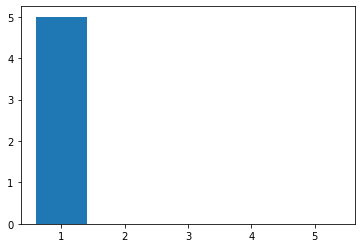

In [44]:
#Also summarize and plot the result.
plt.bar([1,2,3,4,5],v)

v) Find outliers in sepal length using boxplot and boxplot.stats

<AxesSubplot:>

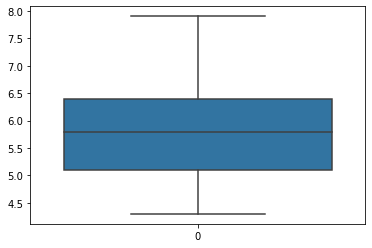

In [19]:
sns.boxplot(data=iris['Sepal.Length'])